## 1. Riesgo de accidente cerebrovascular y habitos de vida

### Importando librerias

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Leyendo csv

In [36]:
df=pd.read_csv('/home/renso/Downloads/healthcare-dataset-stroke-data.csv')

### Seleccionando columnas

In [38]:
columnas = ['smoking_status', 'work_type', 'bmi']
column_select = df[columnas].copy()

### Calculando la media

In [48]:
medias = column_select.groupby(['smoking_status', 'work_type'])['bmi'].mean().reset_index()
### la funcion groupby junta las columnas elegidas y hace combinaciones unicas. Luego la funcion mean saca el promedio
### de esas combinaciones y reset_index convierte el resultado en un DataFrame normal.
print(medias)

     smoking_status      work_type        bmi
0           Unknown       Govt_job  29.852586
1           Unknown   Never_worked  22.037500
2           Unknown        Private  29.886393
3           Unknown  Self-employed  29.545205
4           Unknown       children  19.700995
5   formerly smoked       Govt_job  31.315079
6   formerly smoked        Private  30.919721
7   formerly smoked  Self-employed  30.586294
8   formerly smoked       children  20.208333
9      never smoked       Govt_job  30.281455
10     never smoked   Never_worked  27.550000
11     never smoked        Private  30.171537
12     never smoked  Self-employed  30.197799
13     never smoked       children  23.655556
14           smokes       Govt_job  30.910619
15           smokes        Private  30.511024
16           smokes  Self-employed  30.457895
17           smokes       children  22.950000


### Gráfico de barras (barplot) que muestra la media de la variable elegida por combinación de smoking_status y work_type.

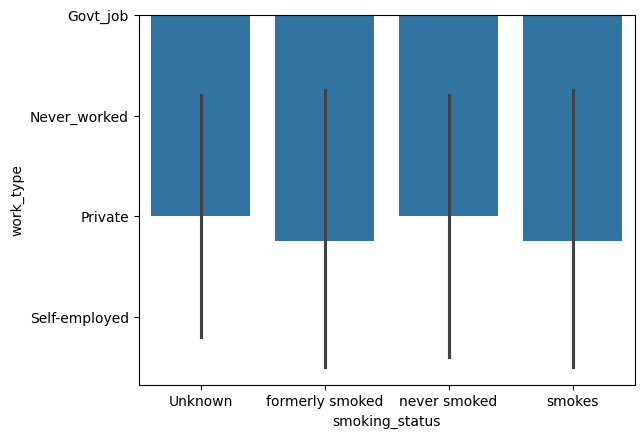

In [69]:
barra = sns.barplot(medias, x='smoking_status', y='work_type')
### La funcion barplot toma como parametros la variable elegida (los valores), un eje x, un eje y. En este caso, x es smoking_status,
### por otro lado, y es work_type.

#### Heatmap que muestra las medias, con smoking_status en un eje y work_type en el otro.

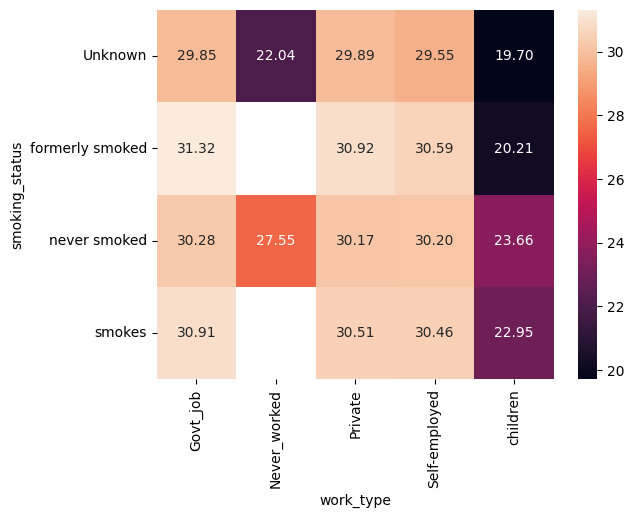

In [72]:
heat = medias.pivot(index="smoking_status", columns="work_type", values='bmi')
sns.heatmap(heat, annot=True, fmt='.2f')
plt.show()

### Se crea una variable llamada heat, la cual contiene el data frame medias junto con la funcion pivot. Esta funcion
### toma dos atributos, en este caso smoking_status, work_type y los convierte a un formato ancho. El parametro values toma la variable
### elegida, en este caso es bmi.

### la funcion heatmap, toma la variable heat, el parametro annot muestra los valores numéricos dentro de cada celda del heatmap y .fmt
### controla el formato de los números que se muestran cuando se usa annot=True.

### Comente cuál de los dos gráficos le resulta más claro para comparar los grupos y por qué, tomando en cuenta el público objetivo del análisis (por ejemplo, personal médico o de salud pública).

#### El grafico mas claro resulta ser el segundo (heatmap), ya que por la representacion de numeros, como se muestra cada eje con su respectivo valor y la barra de la derecha donde muestra que tono de color es correspondiente a cada valor del BMI, es mas facil de entender la informacion de manera rapida.